In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('../data/raw/50_Startups.csv')

In [39]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [42]:
df.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')]

In [43]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [44]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


Mean and median (50%) are similar that suggest that the data distribution is symmetric

In [45]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

No names mistakes

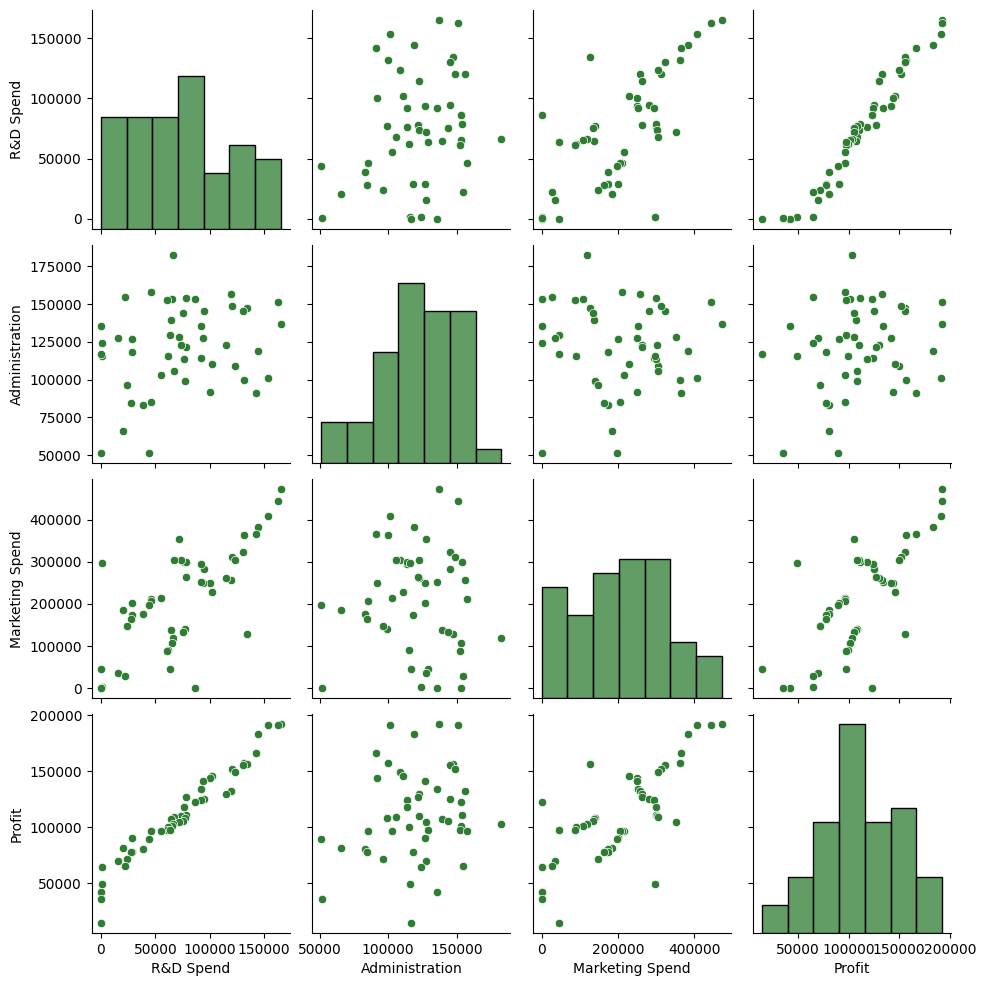

In [46]:
sns.set_palette(['#2E7D32'])
sns.pairplot(df)

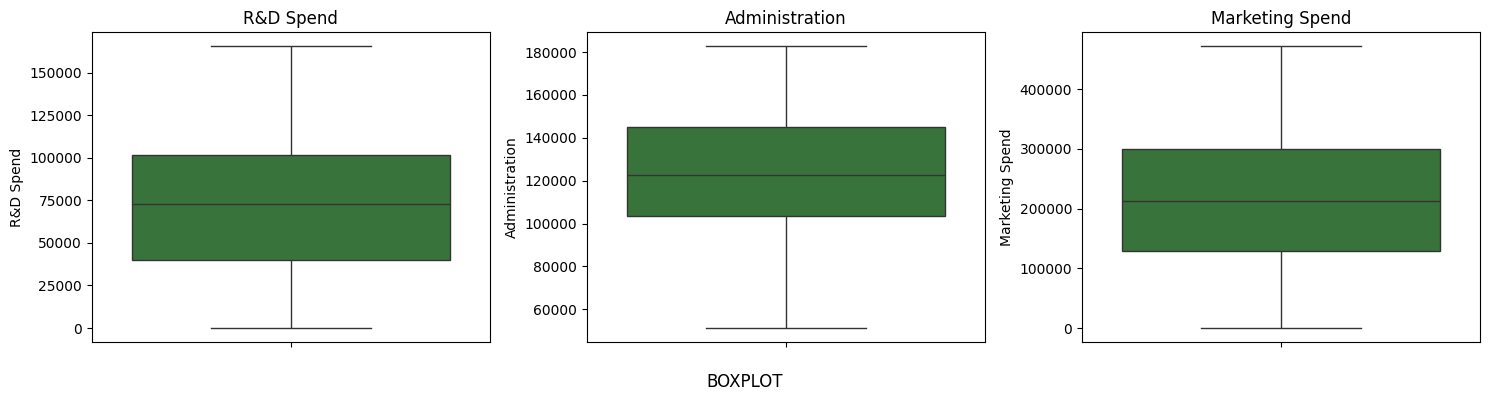

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=df['R&D Spend'], ax=ax1)
ax1.set_title('R&D Spend')

sns.boxplot(y=df['Administration'],  ax=ax2)
ax2.set_title('Administration')

sns.boxplot(y=df['Marketing Spend'], ax=ax3)
ax3.set_title('Marketing Spend')

fig.supxlabel('BOXPLOT')

plt.tight_layout()
plt.show()


<Axes: >

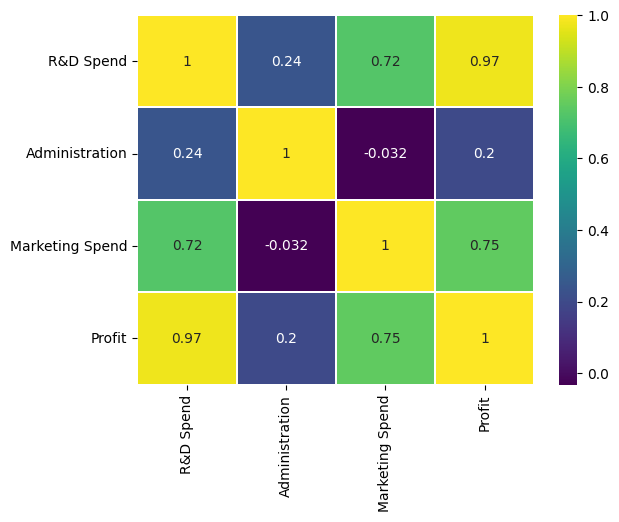

In [48]:
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True, linewidth=0.2)

Interpretacion of the correlation matrix
- R&D Spend shows a very strong positive correlation with Profit (~0.97), indicating it is a powerful predictor.
- Marketing Spend exhibits a moderate positive correlation with Profit (~0.75).
- Administration has a very low correlation with Profit (~0.2), suggesting it may be a less significant feature.

Based on these findings, we could potentially omit the `Administration` feature in a simplified model. However, we will retain it for now to demonstrate the full model building process.

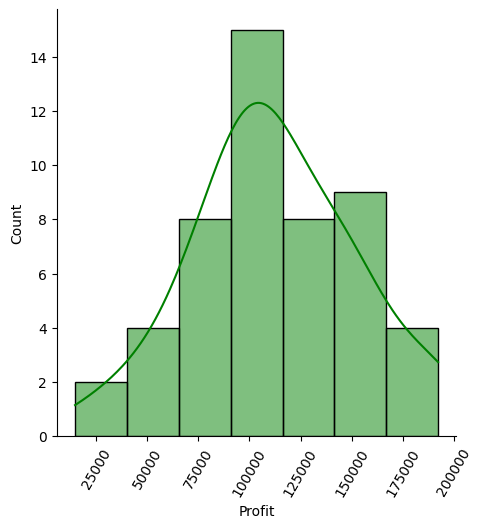

In [49]:
sns.displot(df['Profit'], kde=True, color='green')
plt.xticks(rotation=60)
plt.show()

In [50]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

In [51]:
df = df.rename(columns={
    'R&D Spend': 'RND',
    'Administration': 'ADMIN',
    'Marketing Spend': 'MRK_S',
    'State': 'STATE',
    'Profit': 'PROFIT'
})

In [52]:
cols = ['RND', 'ADMIN', 'MRK_S']
for i in cols:
    df.loc[df[i] < 0, i] = np.nan

In [53]:
df.columns

Index(['RND', 'ADMIN', 'MRK_S', 'STATE', 'PROFIT'], dtype='object')

In [55]:
df.to_parquet("C:/projekty/50-startups/data/clean/50_Startups.parquet")